In [13]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

## 1. Format the Data

In [3]:
df = pd.read_csv('../../assets/datasets/airport2.csv')

In [8]:
df

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33
2,ABQ,2006,392,329,71,124
3,ABQ,2007,366,304,107,45
4,ABQ,2008,333,300,79,42
5,ABQ,2009,192,162,74,26
6,ABQ,2010,222,177,71,50
7,ABQ,2011,345,294,77,61
8,ABQ,2012,237,181,65,60
9,ABQ,2013,232,212,62,46


In [7]:
df.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2009.000000,2373.818182,2633.272727,346.363636,322.363636
std,3.211308,3451.760741,3777.133671,390.555439,408.420572
min,2004.000000,111.000000,162.000000,61.000000,26.000000
25%,2006.000000,232.000000,235.000000,73.000000,37.000000
50%,2009.000000,359.000000,355.000000,84.000000,54.000000
75%,2012.000000,5324.000000,6303.000000,790.000000,655.000000
max,2014.000000,13837.000000,14480.000000,1064.000000,1116.000000


In [5]:
df.dtypes

Airport                    object
Year                        int64
Departure Cancellations     int64
Arrival Cancellations       int64
Departure Diversions        int64
Arrival Diversions          int64
dtype: object

Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [14]:
le_sex = preprocessing.LabelEncoder()
df.Airport = le_sex.fit_transform(df.Airport)

## 2. Plot the data

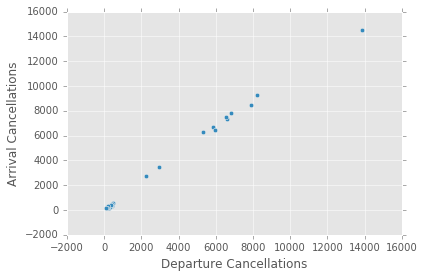

In [16]:
df.plot(kind='scatter', x='Departure Cancellations', y='Arrival Cancellations')

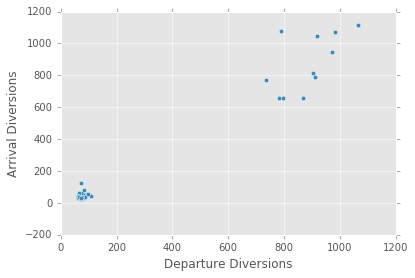

In [17]:
df.plot(kind='scatter', x='Departure Diversions', y='Arrival Diversions')

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [18]:
X = df.ix[:,1:5].as_matrix(columns=None)
y = df.ix[:,0]

#### 3.2 Conduct the k-means clustering

In [33]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

#### 3.3 Compute the labels and centroids

In [34]:
centroids = kmeans.cluster_centers_

In [35]:
clusters = kmeans.labels_

In [36]:
from scipy import stats
labels = np.zeros_like(clusters)
for i in range(k):
    mask = (clusters == i)
    labels[mask] = stats.mode(y[mask])[0]

In [37]:
print(labels)
print(centroids)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 2]
[[  2009.29166667    471.875         526.66666667    140.375     ]
 [  2005.          13837.          14480.            790.        ]
 [  2008.625        6646.75         7472.25          908.875     ]]


#### 3.4 Format the resulting predicted "y" variables and check the accuracy score, classification report, and confusion matrix

In [26]:
metrics.accuracy_score(y, labels)

0.36363636363636365

In [27]:
print(metrics.classification_report(y, labels))

             precision    recall  f1-score   support

          0       0.46      1.00      0.63        11
          1       0.00      0.00      0.00        11
          2       1.00      0.09      0.17        11

avg / total       0.49      0.36      0.27        33



In [28]:
print(metrics.confusion_matrix(y, labels))

[[11  0  0]
 [11  0  0]
 [ 2  8  1]]


**Question**: What are we understand from this these performance metrics? 

## 4. Extra Trees Classifier

In [38]:
trees = ExtraTreesClassifier()
trees.fit(X, labels)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
print trees.feature_importances_

[ 0.03442515  0.31966435  0.38303351  0.26287698]


## 5. KNN Classifier

In [40]:
knn = KNeighborsClassifier()
knn.fit(X, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [42]:
exp = labels
predicted = knn.predict(X)

In [43]:
print(metrics.classification_report(exp, predicted))
print(metrics.confusion_matrix(exp, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        24
          2       1.00      1.00      1.00         9

avg / total       1.00      1.00      1.00        33

[[24  0]
 [ 0  9]]


## 6. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

#### 6.2 Plot the Denrogram

## Extra Trees Classifier

## KNN Classifier